In [1]:
import os
import pandas as pd
import geopandas as gpd
import shapely as shp
import numpy as np
import matplotlib.pylab as plt
import graph_tool.all as gt

class PTS():
    def __init__(self, path):
        ds = {file.replace('.txt','') : pd.read_csv(os.path.join(path, file)) for file in os.listdir(path)}
        for k, v in ds.items():
            self.__setattr__(k, v)

In [37]:
path = '/home/tcicchini/Documentos/Doctorado/proyectoGTFS/trenes-gtfs'
pts = PTS(path)

In [30]:
pts.trips.head()

,route_id,service_id,trip_id,trip_headsign,trip_short_name,direction_id,shape_id
0,1,1,32001211,Once,3200,1,2
1,1,1,32011111,Moreno,3201,0,1
2,1,1,32021211,Once,3202,1,2
3,1,1,32031111,Moreno,3203,0,1
4,1,1,32041211,Once,3204,1,2


In [17]:
pts.stops[pts.stops.stop_id == 293]

,stop_id,stop_name,stop_lat,stop_lon
157,293,Once,-34.60865,-58.408867


In [38]:
pts.stop_times.loc[pts.stop_times.arrival_time.str.match('24:*'),'arrival_time'] = pts.stop_times.loc[pts.stop_times.arrival_time.str.match('24:*'),'arrival_time'].str.replace('24','00')
pts.stop_times.loc[pts.stop_times.departure_time.str.match('24:*'),'departure_time'] = pts.stop_times.loc[pts.stop_times.departure_time.str.match('24:*'),'departure_time'].str.replace('24','00')
pts.stop_times.loc[pts.stop_times.arrival_time.str.match('25:*'),'arrival_time'] = pts.stop_times.loc[pts.stop_times.arrival_time.str.match('25:*'),'arrival_time'].str.replace('25','01')
pts.stop_times.loc[pts.stop_times.departure_time.str.match('25:*'),'departure_time'] = pts.stop_times.loc[pts.stop_times.departure_time.str.match('25:*'),'departure_time'].str.replace('25','01')

pts.stop_times.arrival_time=pts.stop_times.arrival_time.astype('datetime64[ns]')
pts.stop_times.departure_time=pts.stop_times.departure_time.astype('datetime64[ns]')


0        False
1        False
2        False
3        False
4        False
         ...  
70379    False
70380    False
70381    False
70382    False
70383    False
Name: arrival_time, Length: 70384, dtype: bool

In [52]:
pts.stop_times[(pts.stop_times.arrival_time>pd.to_datetime('09:00:00')) &(pts.stop_times.arrival_time<pd.to_datetime('09:15:00'))].merge(pts.trips, on = 'trip_id').merge(pts.stops, on = 'stop_id').sort_values('stop_sequence')

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,shape_dist_traveled,route_id,service_id,trip_headsign,trip_short_name,direction_id,shape_id,stop_name,stop_lat,stop_lon
949,920467233,2025-07-17 09:05:00,2025-07-17 09:05:00,526,1,22,67,3,González Catán,9204,1,68,20 de Junio,-34.780255,-58.737837
25,32691111,2025-07-17 09:05:00,2025-07-17 09:05:00,293,1,7,1,1,Moreno,3269,0,1,Once,-34.608650,-58.408867
49,35691121,2025-07-17 09:05:00,2025-07-17 09:05:00,293,1,7,1,2,Moreno,3569,0,1,Once,-34.608650,-58.408867
432,107115121,2025-07-17 09:04:00,2025-07-17 09:04:00,93,1,11,15,2,Bosques-T,1071,0,15,Constitución,-34.630171,-58.380583
467,107815221,2025-07-17 09:02:00,2025-07-17 09:02:00,43,1,19,15,2,Constitución,1078,1,16,Bosques,-34.819599,-58.230080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
936,382465231,2025-07-17 09:01:00,2025-07-17 09:01:00,463,22,3657,65,3,Retiro (LSM),3824,1,66,Retiro LSM,-34.588130,-58.375689
889,382565131,2025-07-17 09:04:00,2025-07-17 09:04:00,51,22,3616,65,3,Cabred,3825,0,65,Cabred,-34.487824,-59.075658
902,364065211,2025-07-17 09:07:00,2025-07-17 09:07:00,463,22,3657,65,1,Retiro (LSM),3640,1,66,Retiro LSM,-34.588130,-58.375689
903,364065221,2025-07-17 09:07:00,2025-07-17 09:07:00,463,22,3657,65,2,Retiro (LSM),3640,1,66,Retiro LSM,-34.588130,-58.375689


In [24]:
pts.routes.head()

,route_id,route_short_name,route_long_name,route_type
0,1,Sarmiento,Sarmiento / Once - Moreno,2
1,5,Mitre,Mitre / Retiro - Tigre,2
2,7,Mitre,Mitre / Retiro - Mitre,2
3,9,Mitre,Mitre / Retiro - J. L. Suárez,2
4,11,Roca,Roca / Plaza Constitución - La Plata,2


In [56]:
pts.shapes.head()

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence,shape_dist_traveled
0,1,-34.608591,-58.407559,1,1
1,1,-34.608601,-58.407777,2,2
2,1,-34.608611,-58.407995,3,3
3,1,-34.608621,-58.408213,4,4
4,1,-34.608630,-58.408431,5,5


In [47]:
edges = []

for t_id, g in pts.stop_times[(pts.stop_times.arrival_time>pd.to_datetime('09:00:00')) &(pts.stop_times.arrival_time<pd.to_datetime('09:15:00'))].groupby('trip_id'):

    aux = g.merge(pts.trips, on = 'trip_id').merge(pts.stops, on = 'stop_id').sort_values('stop_sequence')
    if len(aux) > 0:

        for (i, ri), (j, rj) in zip(aux[:-1].iterrows(), aux[1:].iterrows()):
            edges.append([ri.stop_id, rj.stop_id, ri.route_id, ri.direction_id, ri.service_id, ri.trip_id, (rj.departure_time-ri.arrival_time).seconds])  

    

In [71]:
pts.trips.set_index('trip_id').loc[pts.stop_times[(pts.stop_times.arrival_time>pd.to_datetime('09:00:00')) &(pts.stop_times.arrival_time<pd.to_datetime('09:15:00'))].trip_id].reset_index().drop_duplicates('trip_id')

,trip_id,route_id,service_id,trip_headsign,trip_short_name,direction_id,shape_id
0,32531111,1,1,Moreno,3253,0,1
1,32551112,1,1,Moreno (RÁPIDO),3255,0,1
3,32571111,1,1,Moreno,3257,0,1
6,32591111,1,1,Moreno,3259,0,1
9,32611111,1,1,Moreno,3261,0,1
...,...,...,...,...,...,...,...
938,382865231,65,3,Retiro (LSM),3828,1,66
942,383065231,65,3,Retiro (LSM),3830,1,66
946,383265231,65,3,Retiro (LSM),3832,1,66
949,920467233,67,3,González Catán,9204,1,68


In [48]:
g = gt.Graph(edges, eprops = [('route','int'), ('direction','int'), ('service', 'int'),('trip', 'int'), ('dt', 'int')],)
[g.remove_vertex(v) for v in set(range(0, len(pts.stops)))-set(pts.stops.stop_id)]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [49]:

pos = g.new_vp("vector<double>")
for v in g.vertices():
    if len(pts.stops[pts.stops.stop_id == v]) > 0:
        pos[v] = (pts.stops[pts.stops.stop_id == v].stop_lon.values[0], -pts.stops[pts.stops.stop_id == v].stop_lat.values[0])



328

<Axes: xlabel='stop_lon'>

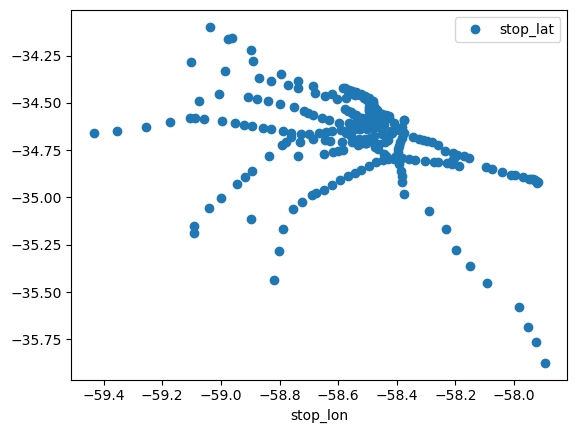

In [73]:
pts.stops.plot(x = 'stop_lon', y = 'stop_lat', lw = 0, marker = 'o')